# Ship as a Wave Buoy using Machine Learning

Welcome to the the project on `Ship as a Wave Buoy using Machine Learning`. In this project, you will use a neural network (NN) in a concept we called "Ship as a Wave Buoy (SAWB)". This project will:
- Allow you to practice your knowledge in machine learning 
- Introduce you to the concept of SAWB

Let's first get familiar with the problem at hand; SAWB. Wave characteristics such as significant wave height, peak period and main direction have an important effect on all aspects of ship operations. Yet, estimation of these characteristics in real time in an accurate, robust and efficient manner poses a significant challenge. Current approaches include using wave buoys, wave radars, weather forecasts and regression based on ship motion statistics. Wave buoys and weather forecasts are not always available and/or reliable, and wave radars are expensive. Statistics based methods work reasonably well for wave height, but fail to estimate peak period and relative wave direction. The concept of SAWB suggests that to infer local sea state information in real time, only ship motions are needed. 

In this project, you will use a machine learning approach in SAWB concept. In particular, you will use a NN on time series of 6-DOF ship motions to estimate the wave characteristics, see artist's impression of SAWB in Figure 1 below. You are free to choose any NN types we covered in the course; MLP, CNN or LSTM.

![Title](sawb_cnn.png)

Figure 1: Artist's impression of SAWB using a CNN

We assume that you have used a Jupyter notebook before. If you haven't, it is actually very simple. Simply press the `Run Cells` button or `shift+enter` to run each of the cells. To get more information on using jupyter notebooks, see [this tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/).

## Section 0: Preliminaries

Let's first import the necessary libraries to load and inspect the data.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Section 1: Data

In this project, you will use numerical simulation data. This data was generated with a time-domain seakeeping and manoeuvring code in 6-DOF. A strip theory based seakeeping tool in the frequency domain was used as a preprocessor to calculate added mass and damping coefficients and diffraction forces. A frigate-type naval vessel was used as the geometry. The ship was controlled in heading mode; the autopilot maintained the heading of the vessel rather than its track. The simulations were carried out at a ship speed of 15 kn for a duration of 600 seconds using a time step size of 0.25 second. 

![Title](simulation_seaStates_lhs3D.png)

Figure 2: 10000 sea states generated with Latin hypercube sampling (LHS) for the uniformly distributed Hs, Tp and Dp.

Ten thousand simulations were carried out for a wide range of **significant wave height (Hs)**, **peak period (Tp)** and **wave direction (Dp)**. Hs, Tp and Dp were uniformly distributed over the ranges of **[1 m; 7.5 m]**, **[6.5 s; 15.5 s]** and **[0 deg; 360 deg)**, respectively. Latin hypercube sampling (LHS) was then used to sample 10000 points from this 3D input domain. Figure 2 shows the generated sea states. The waves were long-crested, and realized using Jonswap spectrum with $\gamma = 3.3$.

Let's now load the simulation data.

In [4]:
data = np.load('Data_Project1.npz', allow_pickle=True)

Read the time series of the 6-DOF motions and the wave characteristics: 

In [5]:
X = data['X']
Hs = data['Hs']
Tp = data['Tp']
Dir = data['Dir']

Let's now look at the shape of *X*:

In [13]:
print(X.shape)

(9927, 6, 1920)


The shape of **X** follows the convention of **(m, H, W)**. Here, *m* refers to the number of samples in the data, *H* height and *W* width. For our data, this means that we have 9927 samples. Out of 10000 simulations, 73 were removed as the ship capsized in those simulations. 

The height is 6 referring to the 6-DOF motions. This corresponds to **surge**, **sway**, **heave**, **roll**, **pitch** and **yaw** motions of the ship, respectively. Angular motions are in degrees and the translational motions are in meters. 

The width is 1920 indicating the number of data points in time. The interval between two data points is 0.25 seconds. This means that 1920 data points cover a duration of 480 seconds. So, we have 8 minutes of data from each simulation.

Let's now look at the shape of **Hs**, **Tp** and **Dir**:

In [14]:
print(Hs.shape, Tp.shape, Dir.shape)

(9927,) (9927,) (9927,)


Not surprisingly we have 9927 **Hs**, **Tp** and **Dir** values corresponding to each simulation. **Hs** is in meters, **Tp** in seconds and **Dir** in degrees.

Let's now draw three random samples from the data and plot the motions. 

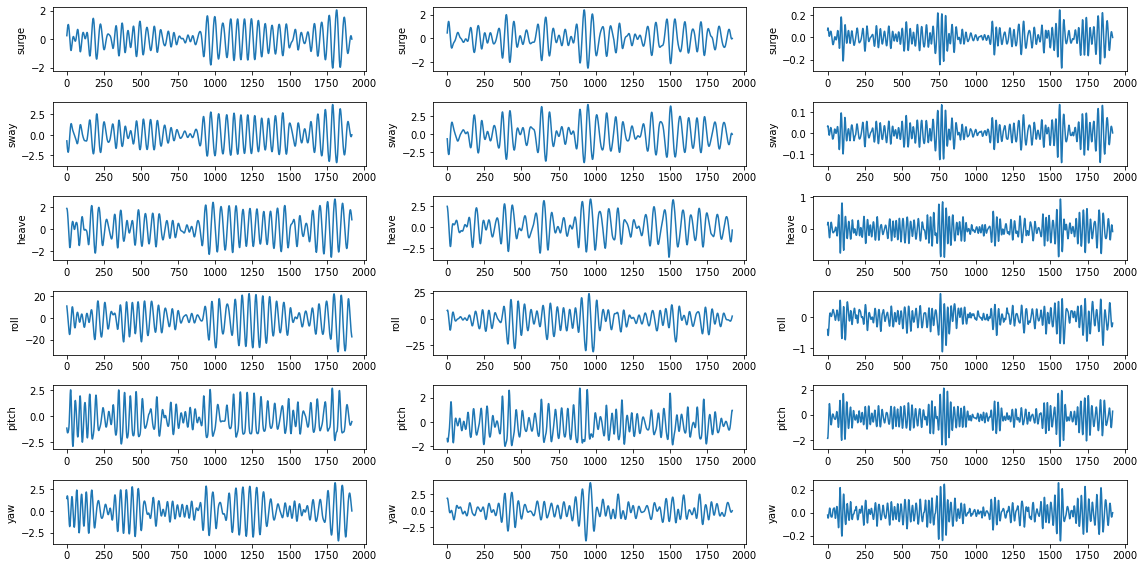

In [15]:
fig, axes = plt.subplots(6, 3, figsize=(16, 8))
ylabels = ['surge','sway','heave','roll','pitch','yaw']
isamples = np.random.randint(0, X.shape[0], size=3)
for i in range(len(isamples)):
    for j in range(6):
        axes[j,i].plot(data['X'][isamples[i],j,:])
        axes[j,i].set_ylabel(ylabels[j])
plt.tight_layout()

Figure 3: Samples from **X**. 6-DOF motions from each sample is plotted in each column.

Now it is your turn. Can you design a NN to predict the wave characteristics from the ship motions? Good luck!